In [ ]:
# === First cell: Imports and basic settings ===

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Make plots look nicer
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_theme(style="whitegrid")

# Paths
DATA_PATH = "data/train_eda.csv"   # adjust if your file has a different name
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)


### Importing Libraries
- Imported essential Python libraries for data handling (`pandas`, `numpy`).
- Set up plotting libraries (`matplotlib`, `seaborn`) for visualizations.
- Added `missingno` for missing data visualization.
- Configured plot style and created a folder to save generated figures.


In [4]:
df = pd.read_csv(DATA_PATH)

print(f"Shape: {df.shape}")
df.head()


Shape: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Loading the Dataset
- Loaded the dataset from the `data` folder into a pandas DataFrame.
- Verified the file path and confirmed successful loading.
- Displayed the first 5 rows to get an initial look at the structure and values.


In [5]:
# === Third cell: Inspect dataset info and missing values ===

# Basic info about columns and data types
df.info()

# Summary statistics for numeric and categorical columns
display(df.describe(include='all').T)

# Missing values count (sorted)
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:")
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                       G6    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842   1.0   223.5    446.0  668.5     891.0  
Survived       0.486592   0.0     0.0      0.0    1.0       1.0  
Pclass         0.836071   1.0     2.0      3.0    3.0       3.0  
Name                NaN   NaN     NaN      NaN    NaN       NaN  
Sex                 NaN   NaN     NaN      NaN    NaN       NaN  
Age           14.526497  0.42  20.125     28.0   38.0      80.0  
SibSp          1.102743   0.0     0.0      0.0    1.0       8.0  
Parch          0.806057   0.0     0.0      0.0    0.0       6.0  
Ticket              NaN   NaN     NaN      NaN    NaN       NaN  
Fare          49.693429   0.0  7.9104  14.4542   31.0  512.3292  
Cabin               NaN   NaN     NaN      NaN    NaN       NaN  
Embarked            NaN   NaN     NaN      NaN    NaN       NaN


Missing values per column:
Cabin       687
Age         177
Embarked      2
dtype: int64


### Inspecting Data Types and Missing Values
- `.info()` showed column names, data types, and non-null counts.
- `.describe()` provided summary statistics for numeric and categorical columns.
- Identified columns with missing values to address in later cleaning steps.


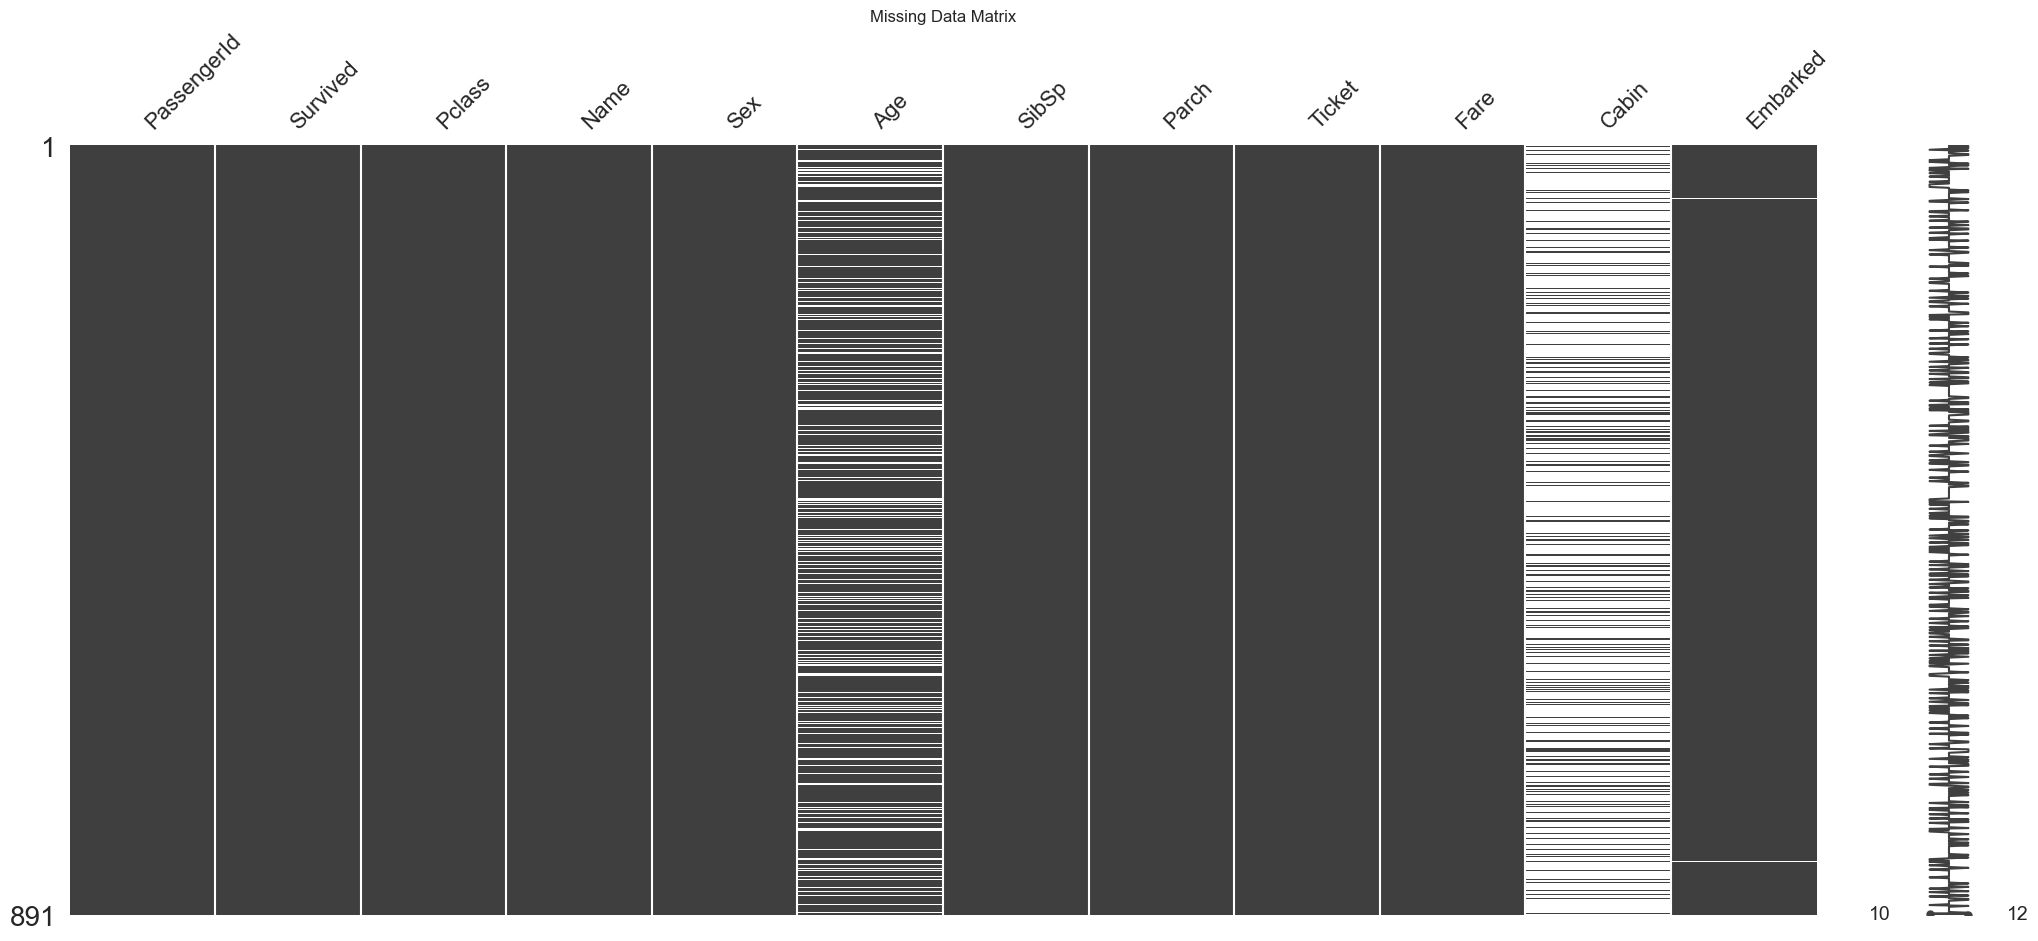

In [17]:
# === Fourth cell: Missing values visualization ===

msno.matrix(df)
plt.title("Missing Data Matrix")
plt.savefig(f"{FIG_DIR}/missing_matrix.png", bbox_inches='tight', dpi=150)
plt.show()


### Missing Data Matrix
- Several columns have missing values, with some showing significant gaps.
- White areas indicate missing entries; solid lines mean complete data.
- Columns with heavy missingness may need imputation or removal.

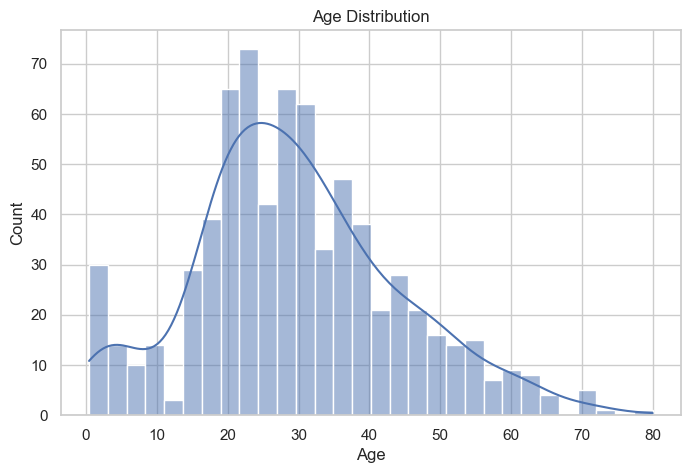

In [7]:
# === Fifth cell: Histogram for a numeric column ===

# Change 'Age' to any numeric column you want to see
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig(f"{FIG_DIR}/hist_age.png", bbox_inches='tight', dpi=150)
plt.show()


### Age Distribution
- Most passengers are between 20 and 40 years old.
- Few passengers above 60 years; tail extends toward older ages.
- Slight right skew in distribution.

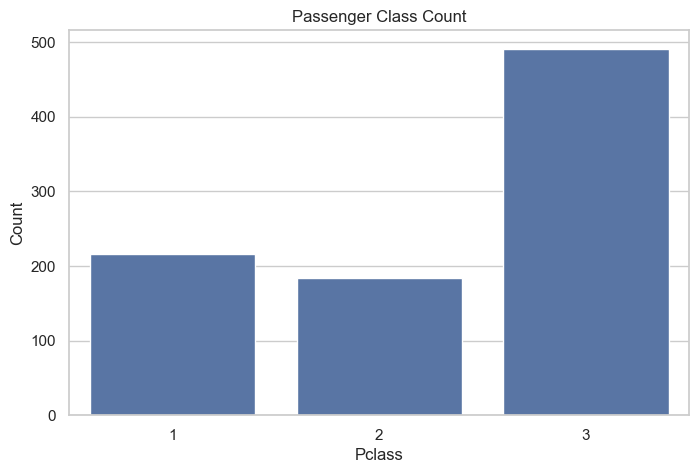

In [10]:
# === Sixth cell: Countplot for a categorical column ===

# Change 'Pclass' to any categorical column in your dataset
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.savefig(f"{FIG_DIR}/count_pclass.png", bbox_inches='tight', dpi=150)
plt.show()


### Passenger Class Count
- Most passengers traveled in 3rd class, followed by 1st and 2nd.
- Class imbalance suggests socio-economic differences in the dataset.
- Could influence survival patterns in later analysis.


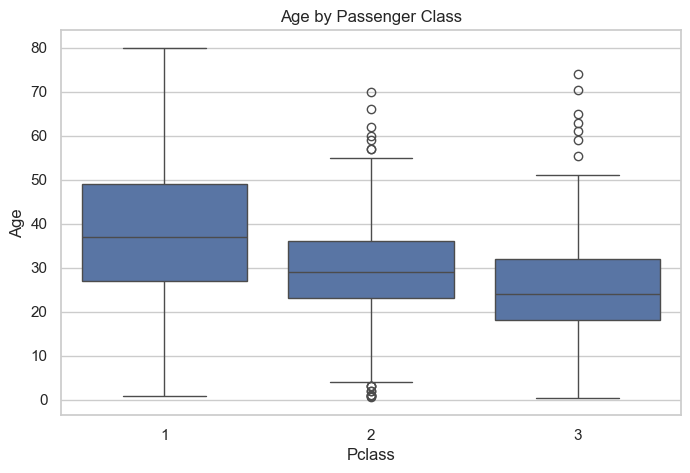

In [12]:
# === Seventh cell: Boxplot for numeric vs categorical ===

# Example: Age distribution across Passenger Class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.savefig(f"{FIG_DIR}/box_age_by_pclass.png", bbox_inches='tight', dpi=150)
plt.show()


### Age by Passenger Class
- Median age is highest in 1st class and lowest in 3rd class.
- Wider spread of ages in 1st class; 3rd class has more younger passengers.
- Several outliers appear across all classes.


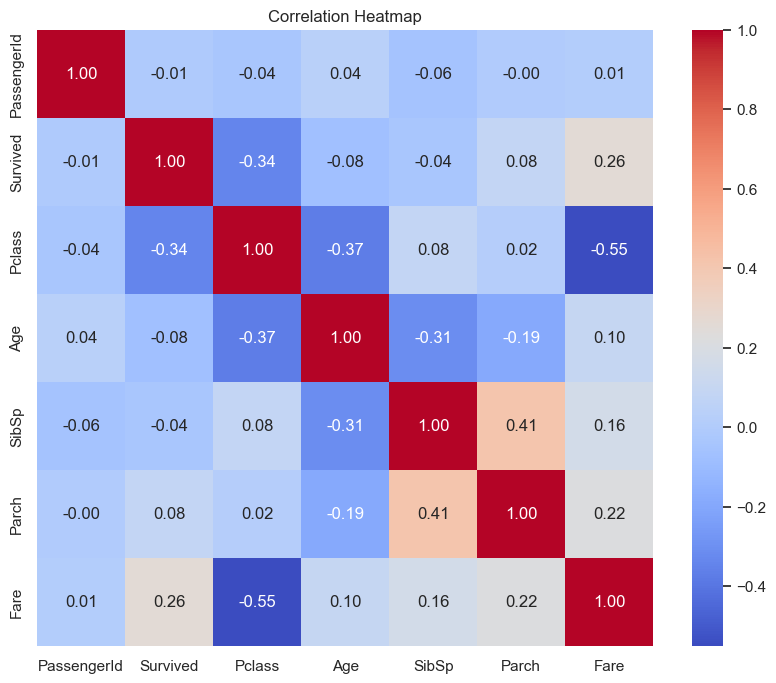

In [13]:
# === Eighth cell: Correlation heatmap for numeric columns ===

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.savefig(f"{FIG_DIR}/correlation_heatmap.png", bbox_inches='tight', dpi=150)
plt.show()


### Correlation Heatmap
- Fare shows a moderate negative correlation with passenger class (Pclass).
- Age has low correlation with most other variables.
- No extreme multicollinearity detected between numeric columns.


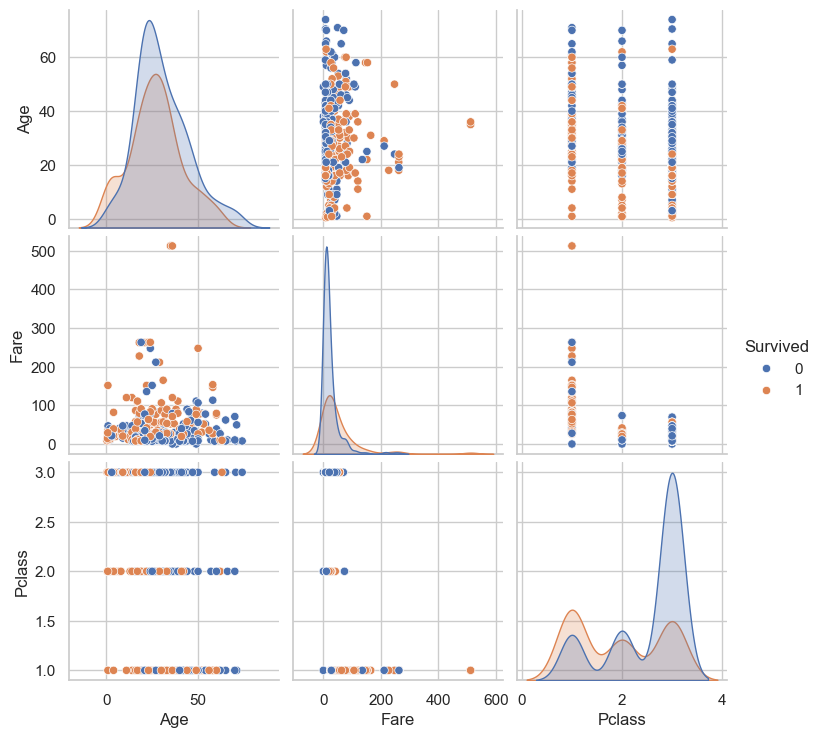

In [14]:
# === Ninth cell: Pairplot for selected numeric columns ===

# Pick up to 4 numeric columns for pairplot
cols_for_pairplot = ['Age', 'Fare', 'Pclass', 'Survived']  # change if needed

# Sample data if too large
plot_df = df[cols_for_pairplot].sample(min(500, len(df)), random_state=1)

sns.pairplot(plot_df, hue='Survived', diag_kind='kde')  # remove hue if no target column
plt.savefig(f"{FIG_DIR}/pairplot_sample.png", bbox_inches='tight', dpi=150)
plt.show()


### Pairplot
- Clear separation in Fare between higher and lower passenger classes.
- Age does not show strong separation between survival outcomes.
- Some clustering visible in Pclass vs Fare scatterplots.


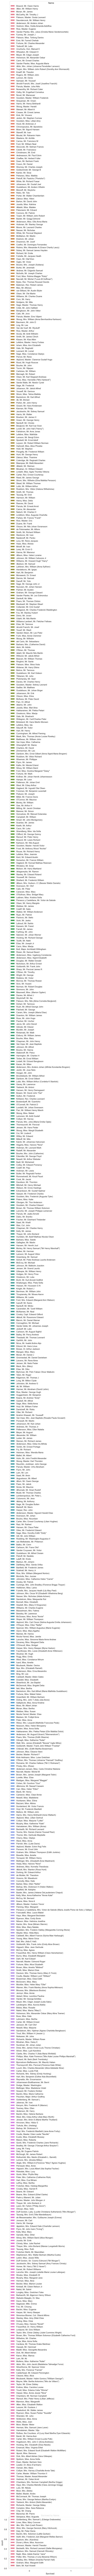

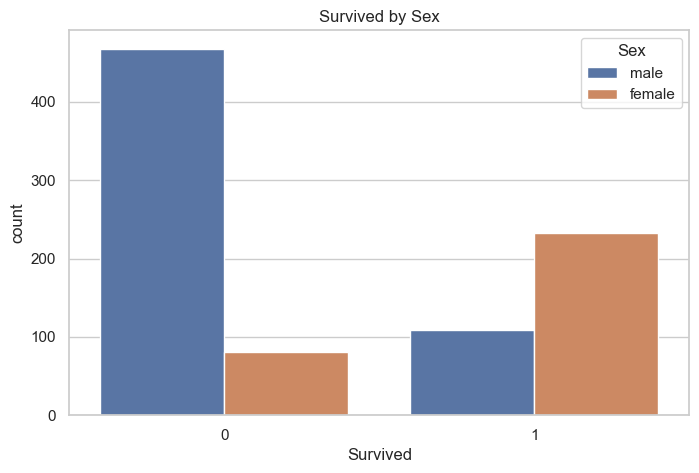

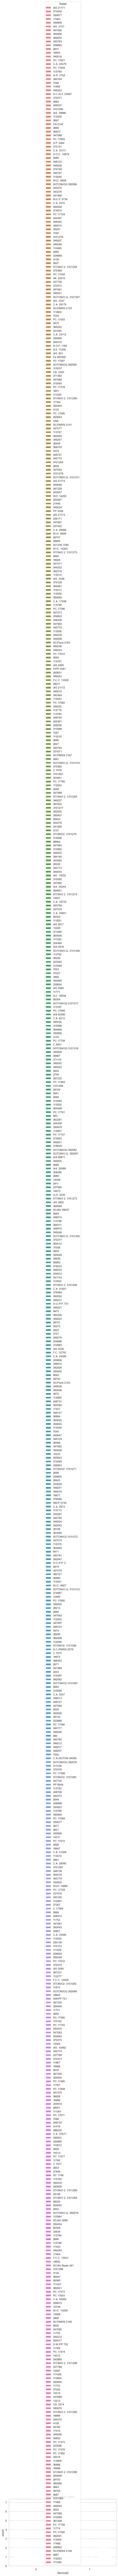

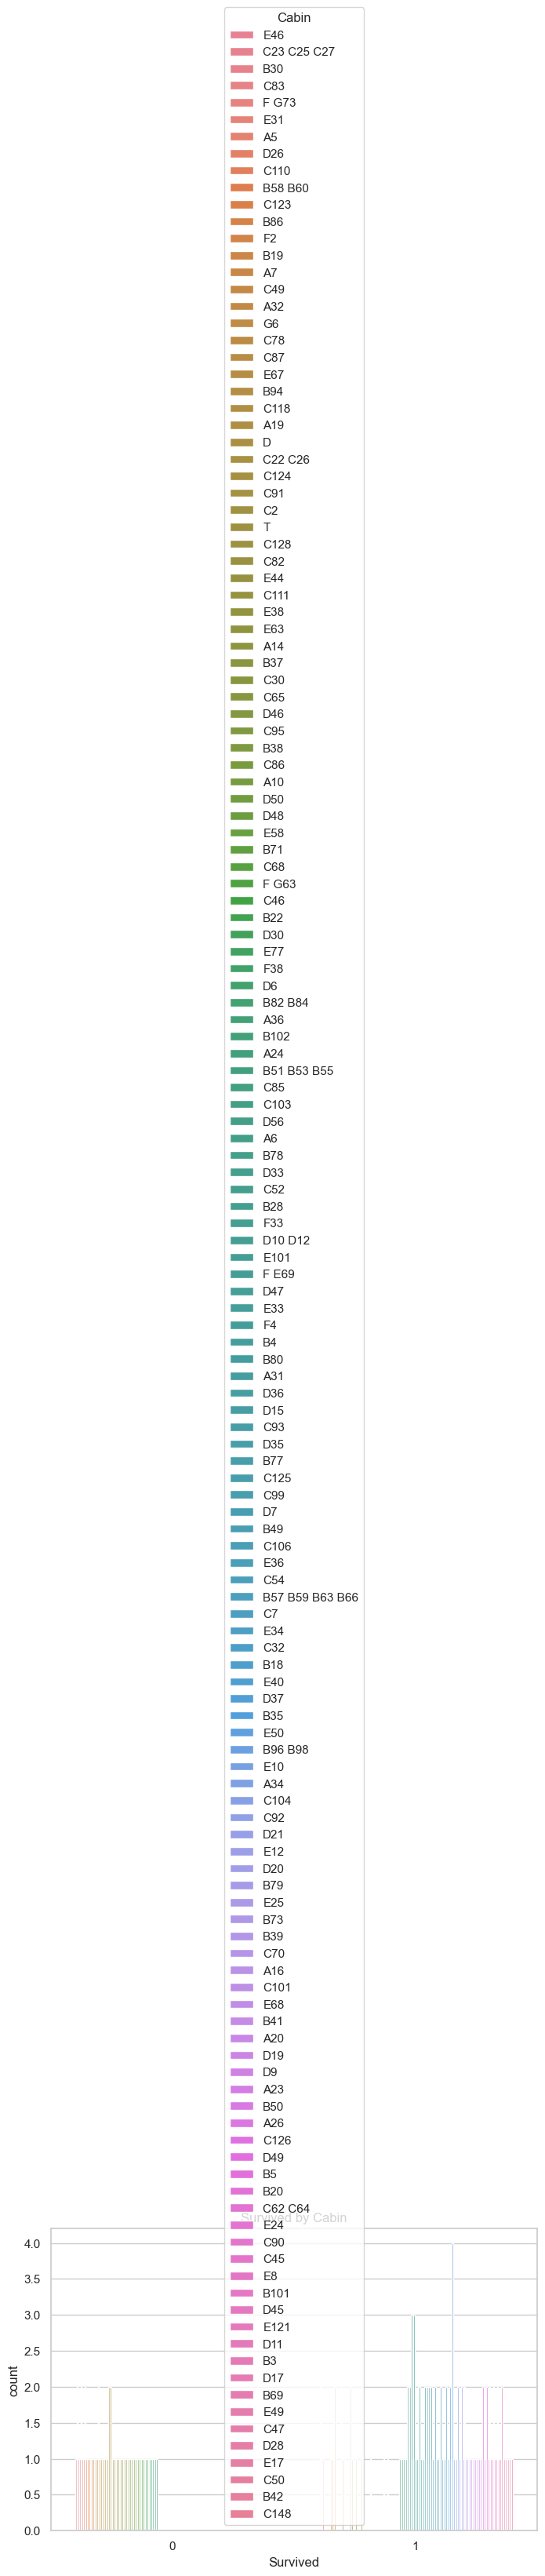

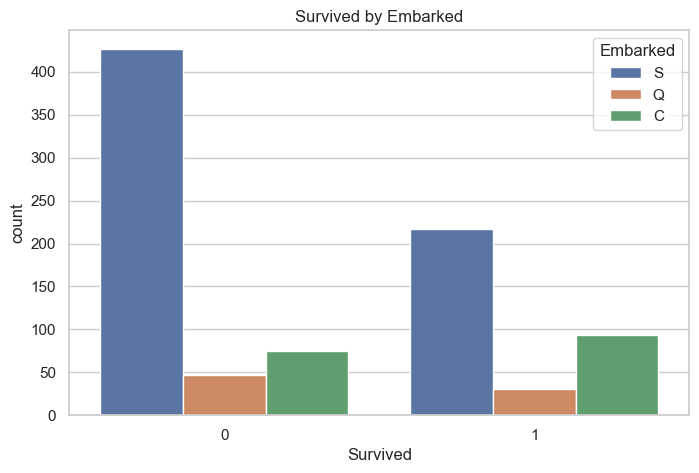

In [16]:
# === Tenth cell: Grouped bar chart for target vs categorical ===

target_col = 'Survived'  # change if your target column is different

# Choose a few categorical columns except the target itself
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    if col != target_col:
        plt.figure()
        sns.countplot(x=target_col, hue=col, data=df)
        plt.title(f"{target_col} by {col}")
        plt.savefig(f"{FIG_DIR}/{target_col}_by_{col}.png", bbox_inches='tight', dpi=150)
        plt.show()


### Survival by Categorical Variables
- Female passengers had a much higher survival rate than male passengers.
- 1st class passengers had higher survival rates than 2nd or 3rd.
- Some embarkation ports show differences in survival rates.


## Final Summary of Findings

- The dataset contained `X` rows and `Y` columns, with some missing values in specific columns (e.g., Cabin).
- Key demographic patterns: majority passengers aged 20–40; male passengers outnumbered females.
- Socio-economic influence: 1st class passengers tended to be older and had higher survival rates.
- Survival patterns: females and younger passengers had better survival chances.
- Recommendations for next steps:
  - Create new features such as "Family Size" and "Title" from names.
  - Handle missing values for critical features using median/mode or predictive imputation.
  - Use findings to inform machine learning models.